## Strategy Comparison

In [1]:
import sys
import warnings
import matplotlib.pyplot as plt
sys.path.append('src')

from PriceLoader import PriceLoader
from RSIStrategy import RSIStrategy
from MACDStrategy import MACDStrategy
from BaseStrategy import Strategy, StrategyResult
from BenchmarkStrategy import BenchmarkStrategy
from MovingAverageStrategy import MovingAverageStrategy
from VolatilityBreakoutStrategy import VolatilityBreakoutStrategy

warnings.filterwarnings("ignore") 
%config InlineBackend.figure_format = 'retina'

In [2]:
prices = PriceLoader('data').load_all()
benchmark = BenchmarkStrategy().run(prices)

strategies = {
    'MA Signal': {
        'result': MovingAverageStrategy().run(prices), 
        'color': 'blue', 'marker': '^'},
    'MACD Signal': {
        'result': MACDStrategy().run(prices), 
        'color': 'red', 'marker': '^'},
    'RSI Signal': {
        'result': RSIStrategy().run(prices), 
        'color': 'green', 'marker': '^'},
    'Vol Signal': {
        'result': VolatilityBreakoutStrategy().run(prices), 
        'color': 'orange', 'marker': '^'}
}

### Signals from Different Strategies

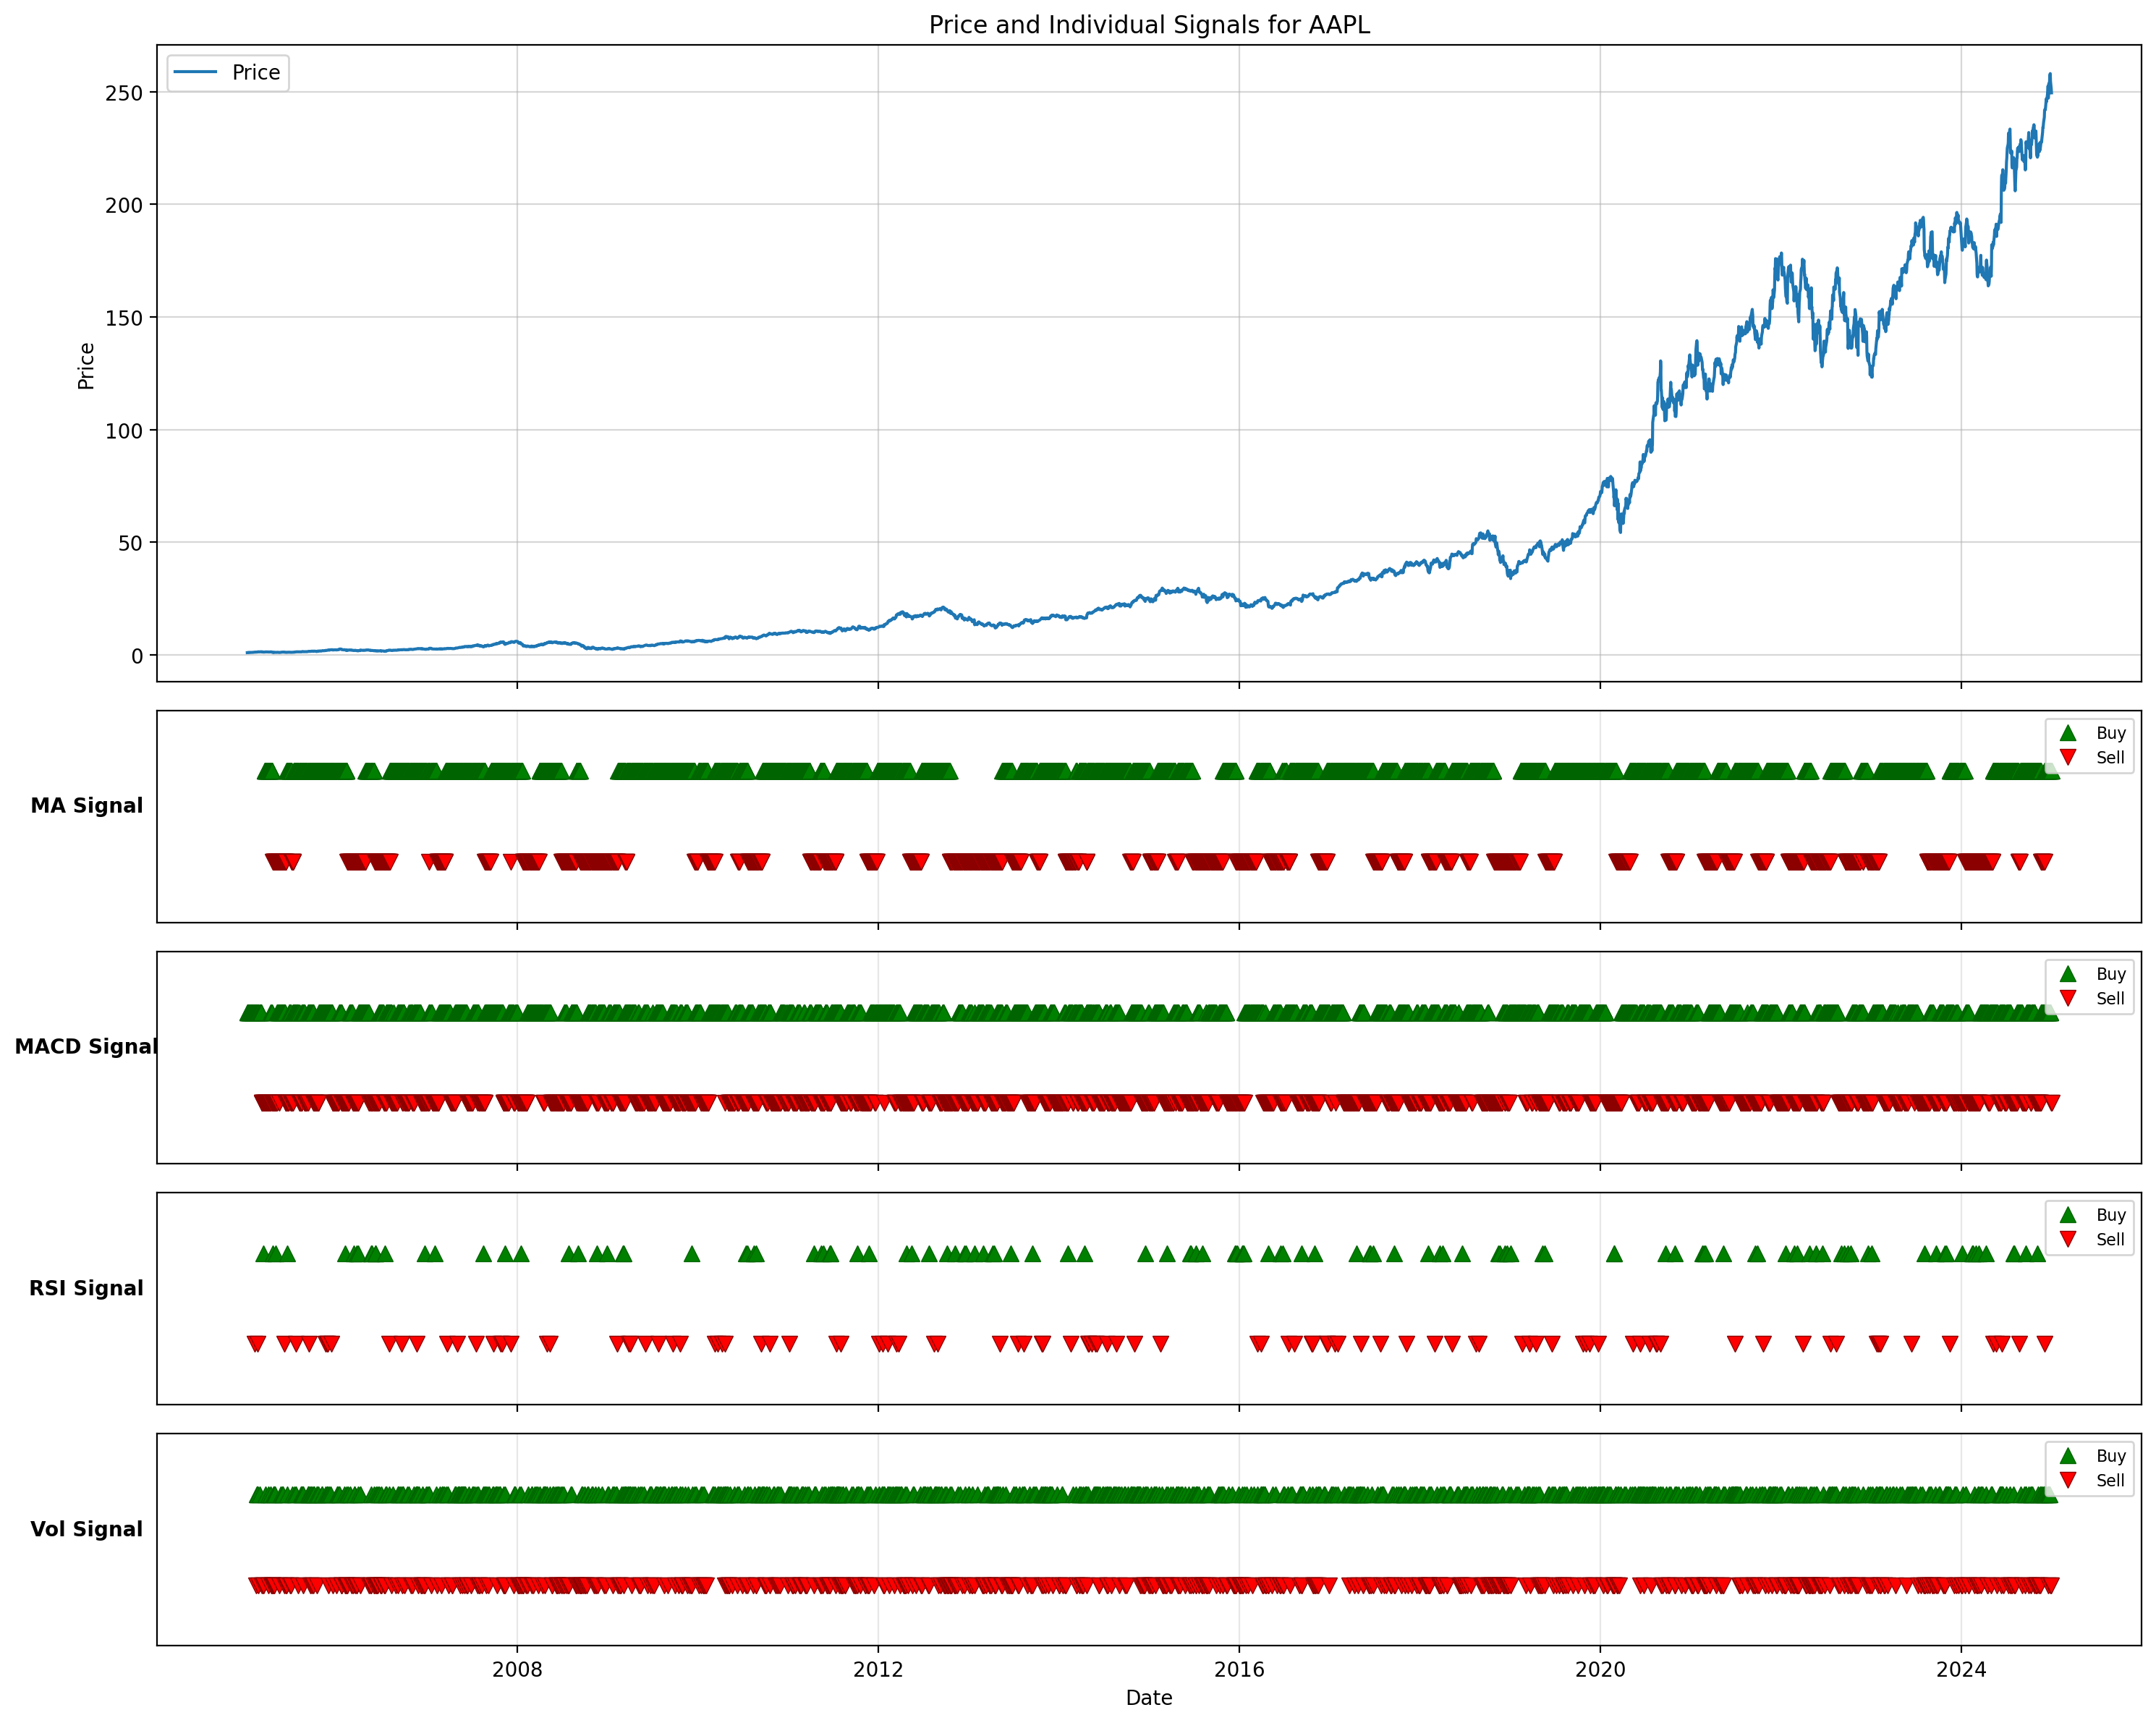

In [3]:
# Signal Overlap Plot
ticker = "AAPL"
fig, axes = plt.subplots(5, 1, figsize = (15, 12), sharex = True,
                         gridspec_kw = {'height_ratios': [3, 1, 1, 1, 1]})

# --- Plot 1: Price ---
axes[0].plot(prices.index, prices[ticker], label = 'Price', linewidth=1.5)
axes[0].set_title(f'Price and Individual Signals for {ticker}')
axes[0].set_ylabel('Price')
axes[0].grid(True, alpha = 0.5)
axes[0].legend()

# --- Plots 2-5: Individual Signals ---
for ax, (name, params) in zip(axes[1:], strategies.items()):
    signals_df = params['result'].signals
    
    # Filter for buy signals (signal == 1)
    buy_signals = signals_df[signals_df[ticker] == 1].index
    # Filter for sell signals (signal == -1)
    sell_signals = signals_df[signals_df[ticker] == -1].index

    # Plot buy signals as upward triangles
    ax.plot(buy_signals, [1] * len(buy_signals),
            marker = '^',
            color = 'green',
            linestyle = 'None',
            markersize = 8,
            label = 'Buy',
            markeredgecolor = 'darkgreen',
            markeredgewidth = 0.5)
    
    # Plot sell signals as downward triangles
    ax.plot(sell_signals, [0.7] * len(sell_signals),
            marker = 'v',
            color = 'red',
            linestyle = 'None',
            markersize = 8,
            label = 'Sell',
            markeredgecolor = 'darkred',
            markeredgewidth = 0.5)

    ax.set_ylabel(name, rotation = 0, labelpad = 35, fontweight='bold')
    ax.grid(True, alpha = 0.3)
    ax.get_yaxis().set_ticks([])
    ax.set_ylim(0.5, 1.2)
    ax.legend(loc='upper right', fontsize=8)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

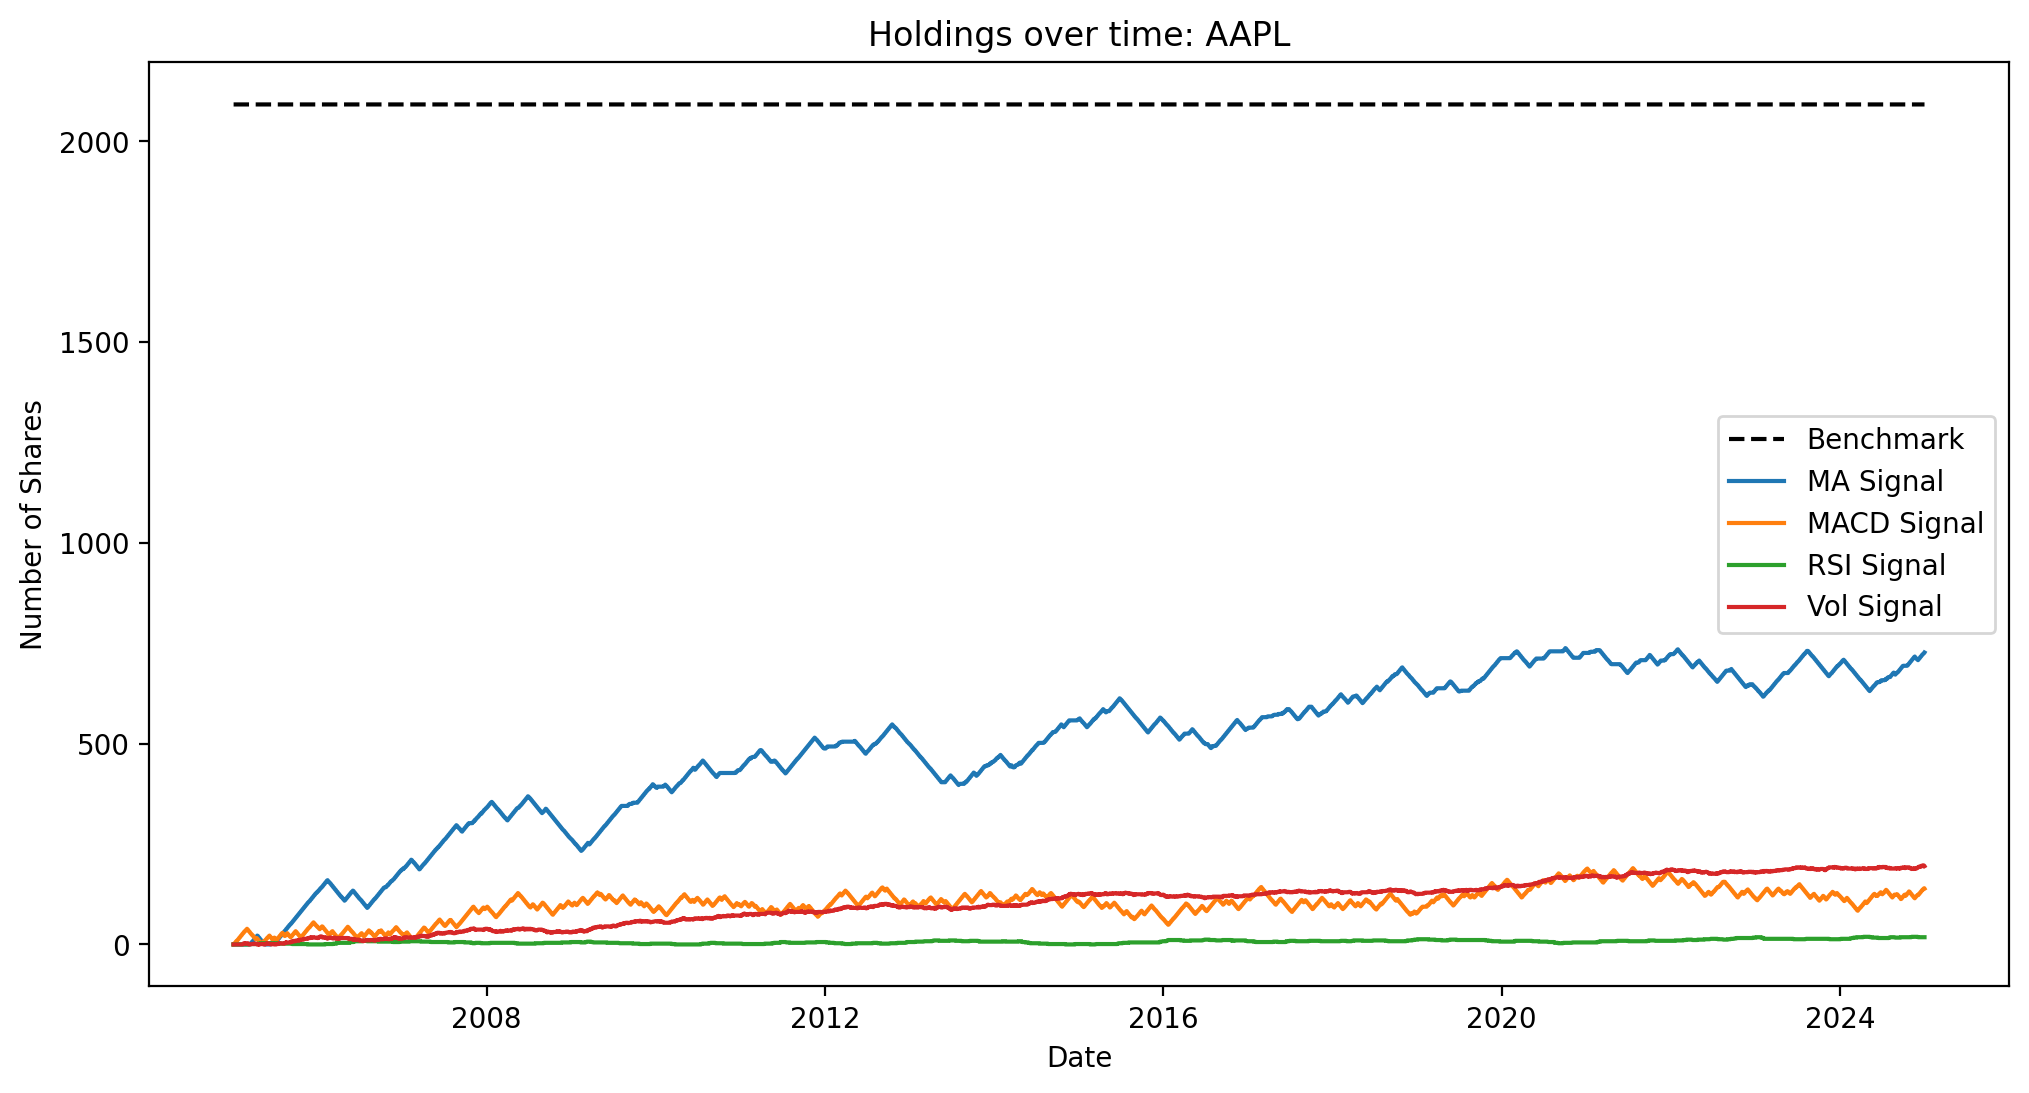

In [4]:
# Holdings over time
plt.figure(figsize = (12,6))
plt.plot(benchmark.positions[ticker], label = 'Benchmark', color = 'black', linestyle = '--')
for name, params in strategies.items():
    plt.plot(params['result'].positions[ticker], label = name)
plt.title(f"Holdings over time: {ticker}")
plt.xlabel("Date")
plt.ylabel("Number of Shares")
plt.legend()
plt.show()

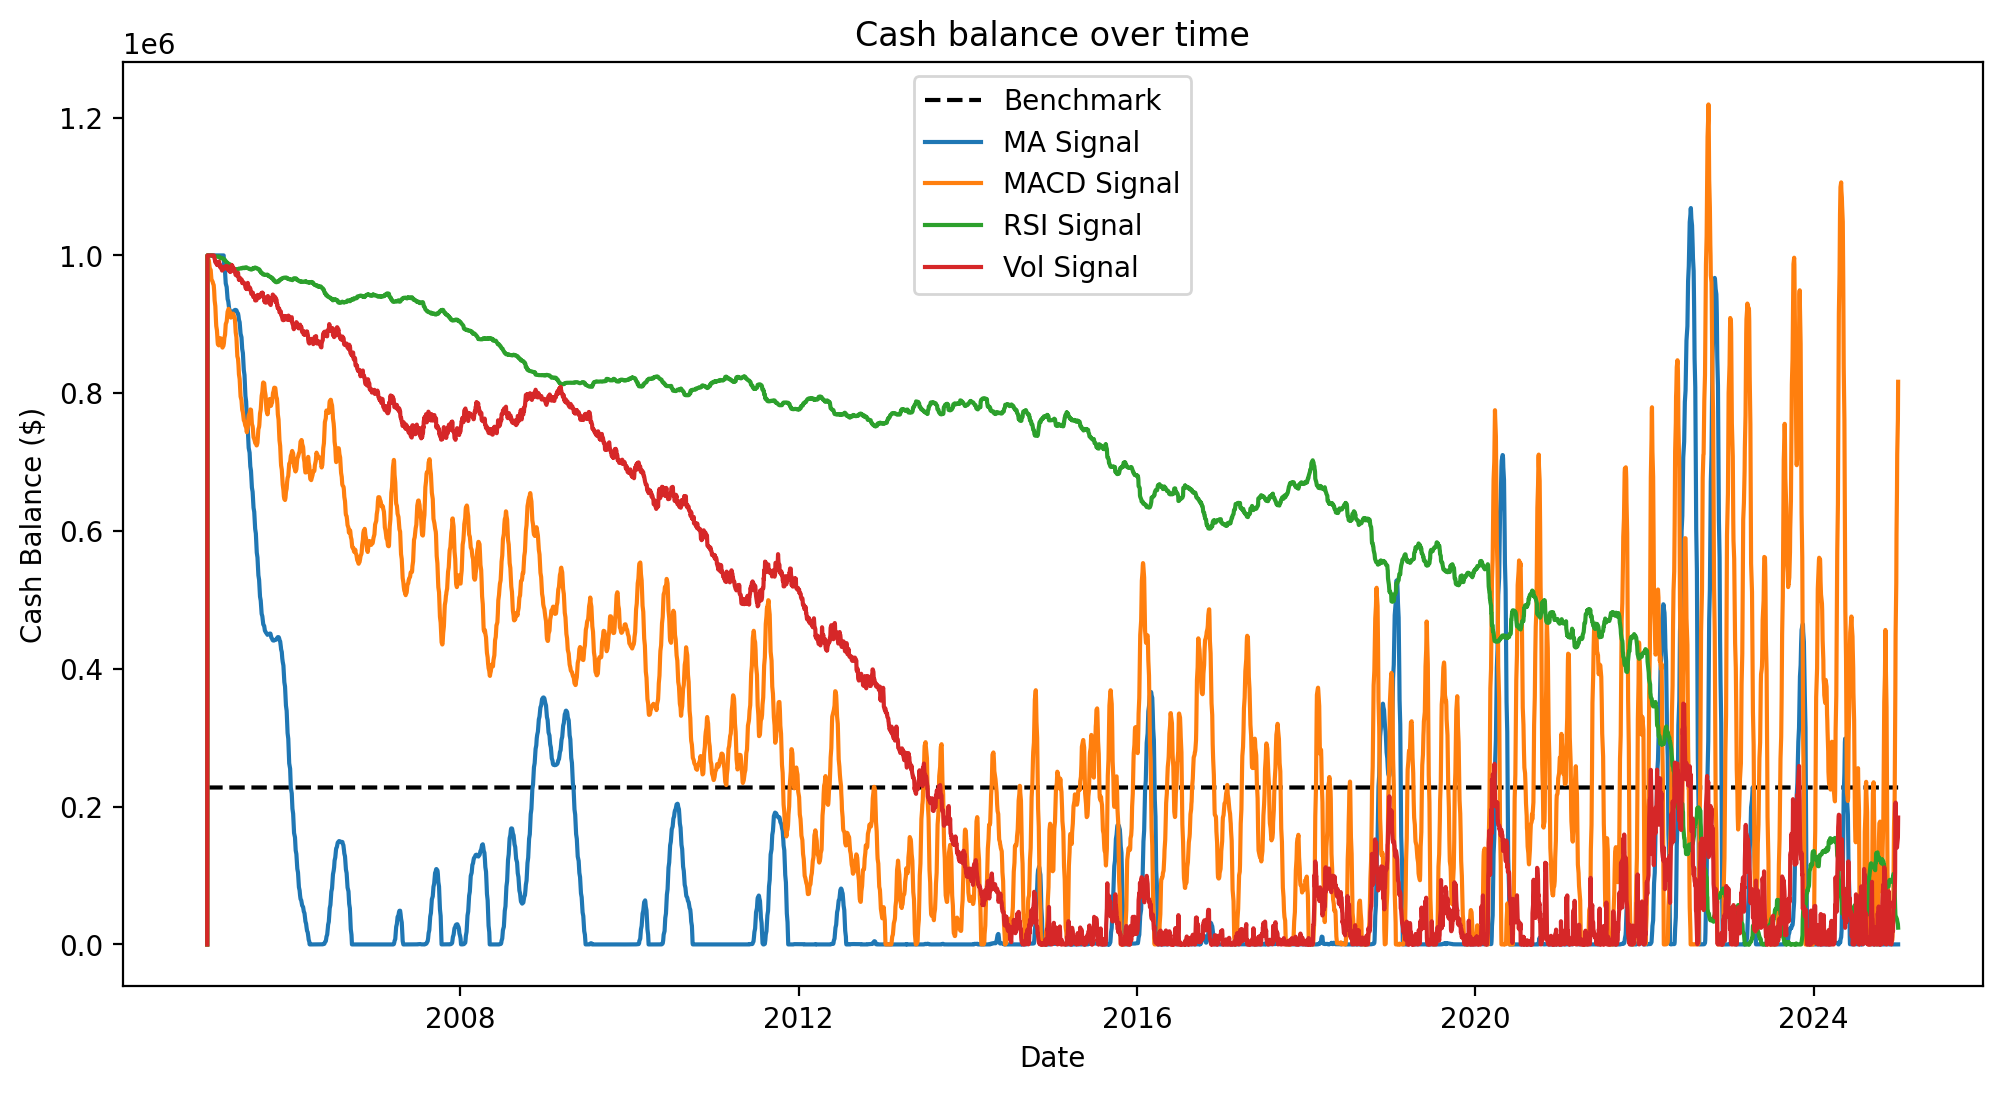

In [4]:
# Cash balance
plt.figure(figsize = (12,6))
plt.plot(benchmark.cash, label = 'Benchmark', color = 'black', linestyle = '--')
for name, params in strategies.items():
    plt.plot(params['result'].cash, label = name)
plt.title("Cash balance over time")
plt.xlabel("Date")
plt.ylabel("Cash Balance ($)")
plt.legend()
plt.show()

### Total Portfolio Value

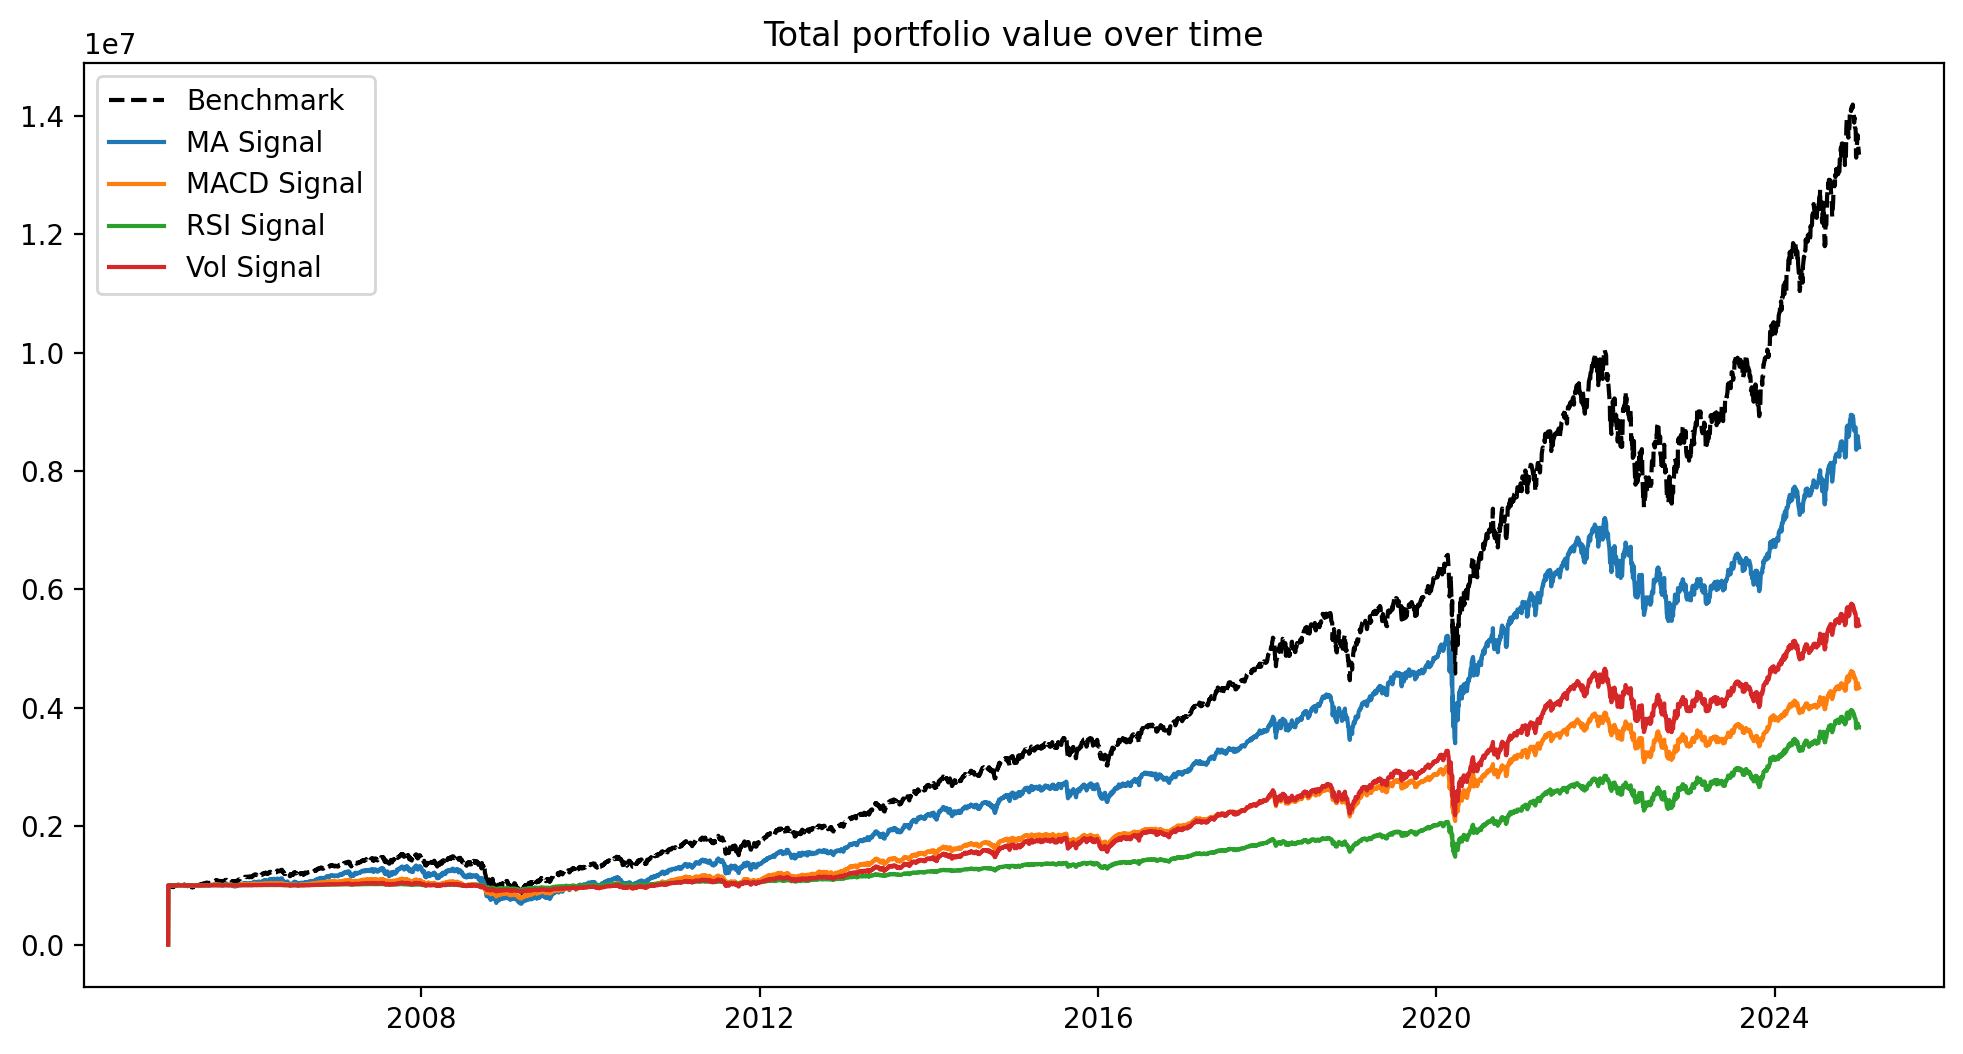

In [5]:
# Total portfolio value
plt.figure(figsize = (12,6))
plt.plot(benchmark.port_val, label = 'Benchmark', color = 'black', linestyle = '--')
for name, params in strategies.items():
    plt.plot(params['result'].port_val, label = name)
plt.title("Total portfolio value over time")
plt.legend()
plt.show()

### Cumulative PnL

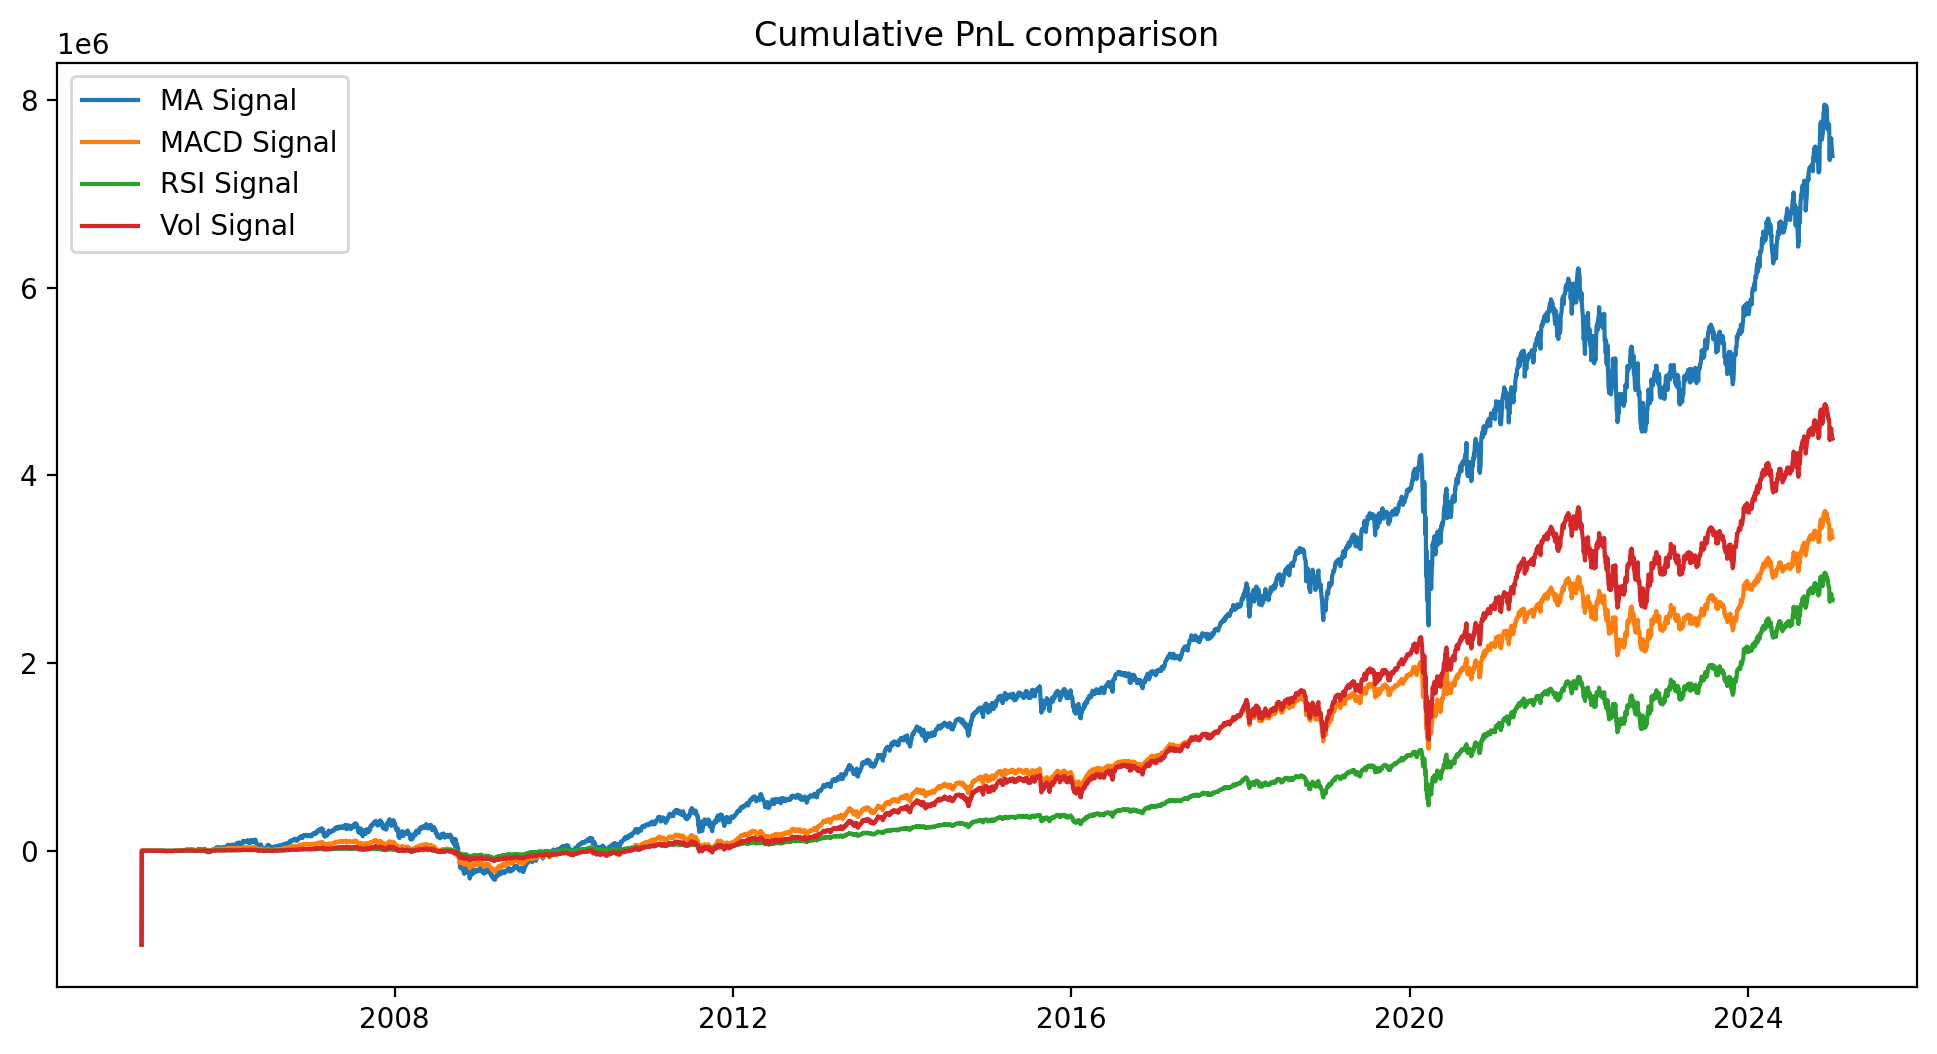

In [6]:
# Cumulative PnL comparison
plt.figure(figsize = (12,6))
for name, params in strategies.items():
    plt.plot(params['result'].cum_pnl, label = name)
plt.title("Cumulative PnL comparison")
plt.legend()
plt.show()